<a href="https://colab.research.google.com/github/KARTHIKA-id12/codealpha_tasks/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Install and Import Libraries
!pip install kaggle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set the style for plots
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.2)

In [ ]:

# Now download the Titanic dataset
!kaggle competitions download -c titanic
!unzip titanic.zip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
unzip:  cannot find or open titanic.zip, titanic.zip.zip or titanic.zip.ZIP.


In [ ]:
# Cell 3: Load and Examine the Data
# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Make a copy of the original data for reference
train_original = train_data.copy()
test_original = test_data.copy()

# Display basic information about the training dataset
print("Training data shape:", train_data.shape)
print("\nFirst 5 rows of the training data:")
display(train_data.head())

print("\nBasic information about the training data:")
train_data.info()

# Display summary statistics
print("\nSummary statistics of the training data:")
display(train_data.describe())

# Check for missing values
print("\nMissing values in training data:")
display(train_data.isnull().sum())

Training data shape: (891, 12)

First 5 rows of the training data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Basic information about the training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary statistics of the training data:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Missing values in training data:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Overall survival rate: 38.38%

Survival rate by gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

Survival rate by passenger class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


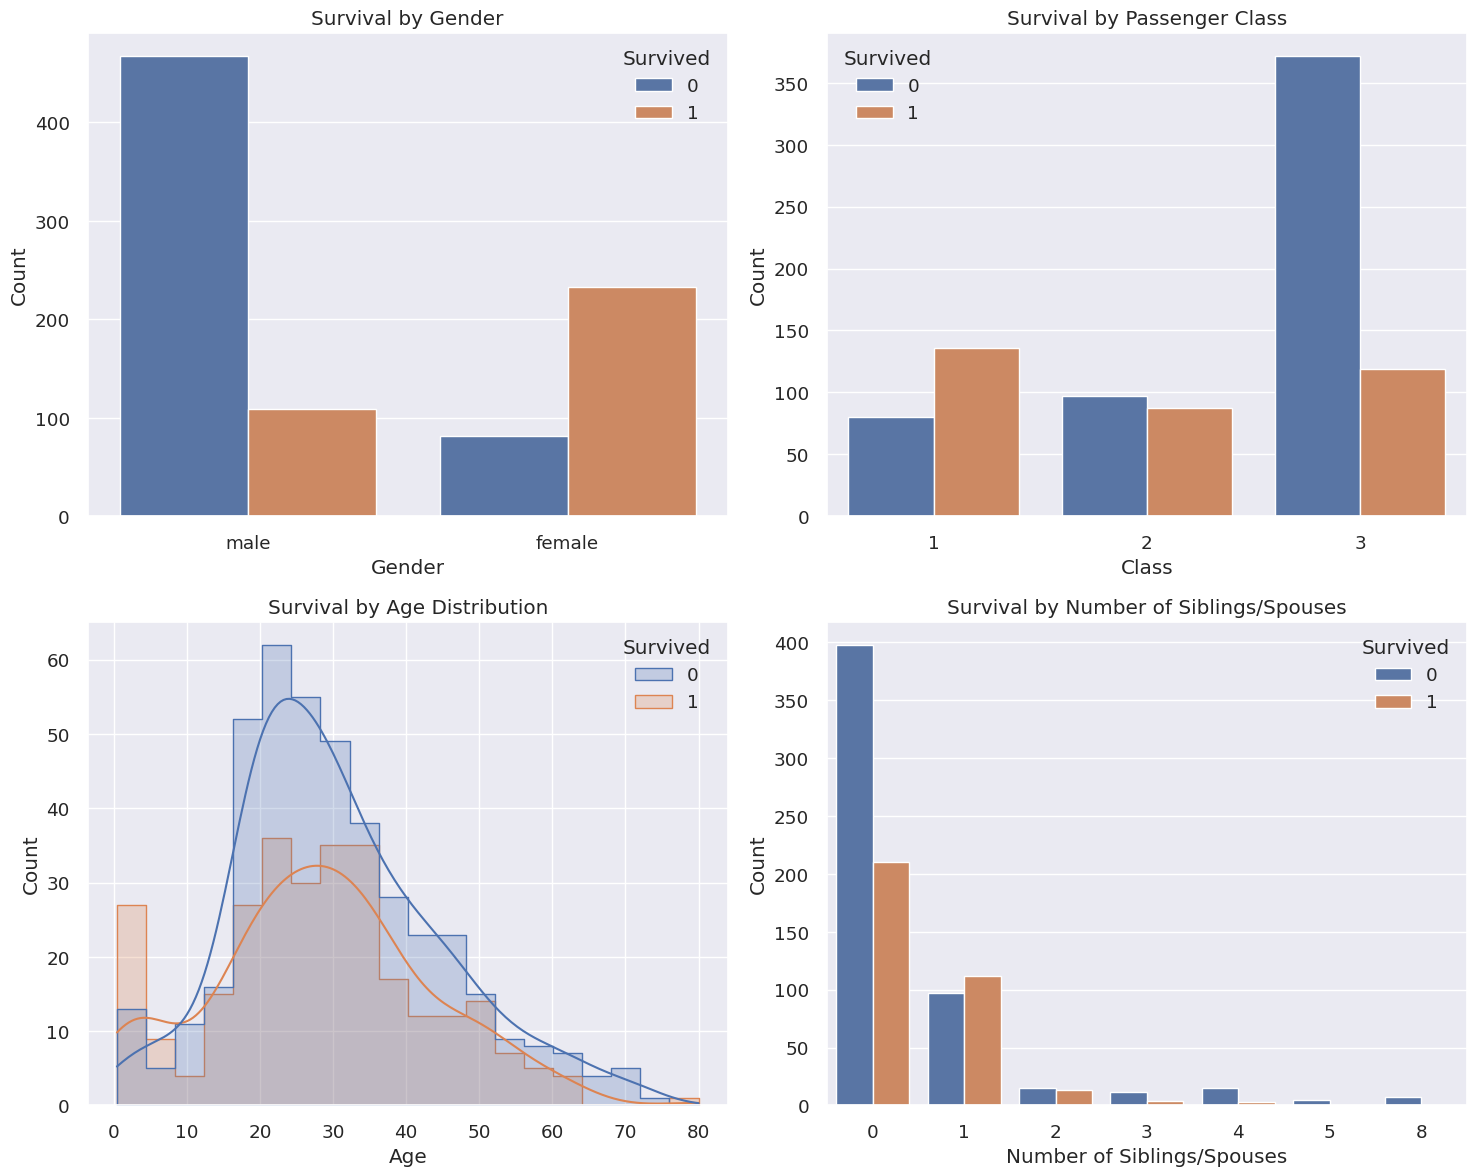

In [ ]:
# Cell 4: Initial Survival Analysis
# Analyze survival rate
print("Overall survival rate: {:.2f}%".format(train_data['Survived'].mean() * 100))

# Survival by gender
gender_survival = train_data.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival rate by gender:")
print(gender_survival)

# Survival by passenger class
class_survival = train_data.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival rate by passenger class:")
print(class_survival)

# Cell 5: Visualize Survival by Key Features
# Create a figure for visualizations
plt.figure(figsize=(15, 12))

# Survival by gender
plt.subplot(2, 2, 1)
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Survival by passenger class
plt.subplot(2, 2, 2)
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Survival by age distribution
plt.subplot(2, 2, 3)
sns.histplot(data=train_data, x='Age', hue='Survived', bins=20, kde=True, element='step')
plt.title('Survival by Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Survival by number of siblings/spouses
plt.subplot(2, 2, 4)
sns.countplot(x='SibSp', hue='Survived', data=train_data)
plt.title('Survival by Number of Siblings/Spouses')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


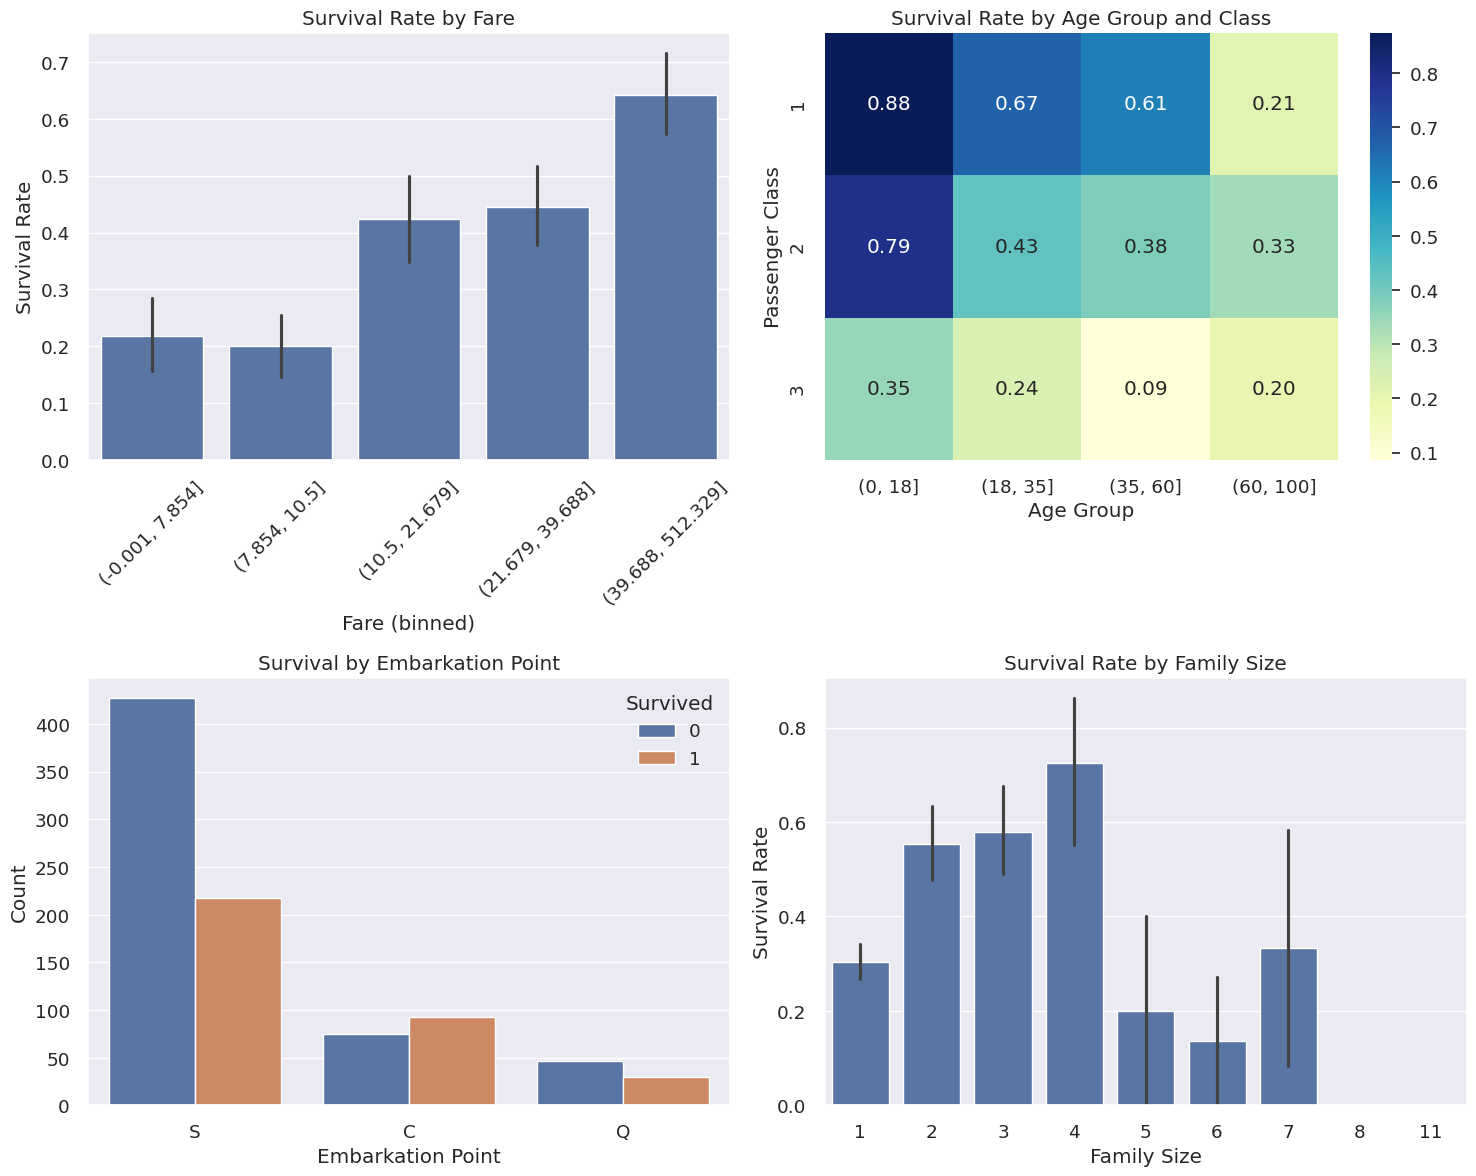

In [ ]:
# Cell 6: More Survival Visualizations
# Create another figure for additional visualizations
plt.figure(figsize=(15, 12))

# Survival by fare
plt.subplot(2, 2, 1)
train_data_temp = train_data.copy()
train_data_temp['FareBin'] = pd.qcut(train_data_temp['Fare'], 5)
sns.barplot(x='FareBin', y='Survived', data=train_data_temp)
plt.title('Survival Rate by Fare')
plt.xlabel('Fare (binned)')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

# Survival by age and class
plt.subplot(2, 2, 2)
# Handle missing Age values for this plot
age_class_data = train_data.copy()
age_class_data['Age'].fillna(age_class_data['Age'].median(), inplace=True)
age_class_surv = age_class_data.pivot_table(index='Pclass',
                                            columns=pd.cut(age_class_data['Age'],
                                                          [0, 18, 35, 60, 100]),
                                            values='Survived',
                                            aggfunc='mean')
sns.heatmap(age_class_surv, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Survival Rate by Age Group and Class')
plt.xlabel('Age Group')
plt.ylabel('Passenger Class')

# Survival by embarkation point
plt.subplot(2, 2, 3)
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title('Survival by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')

# Survival by family size (SibSp + Parch)
plt.subplot(2, 2, 4)
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=train_data)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

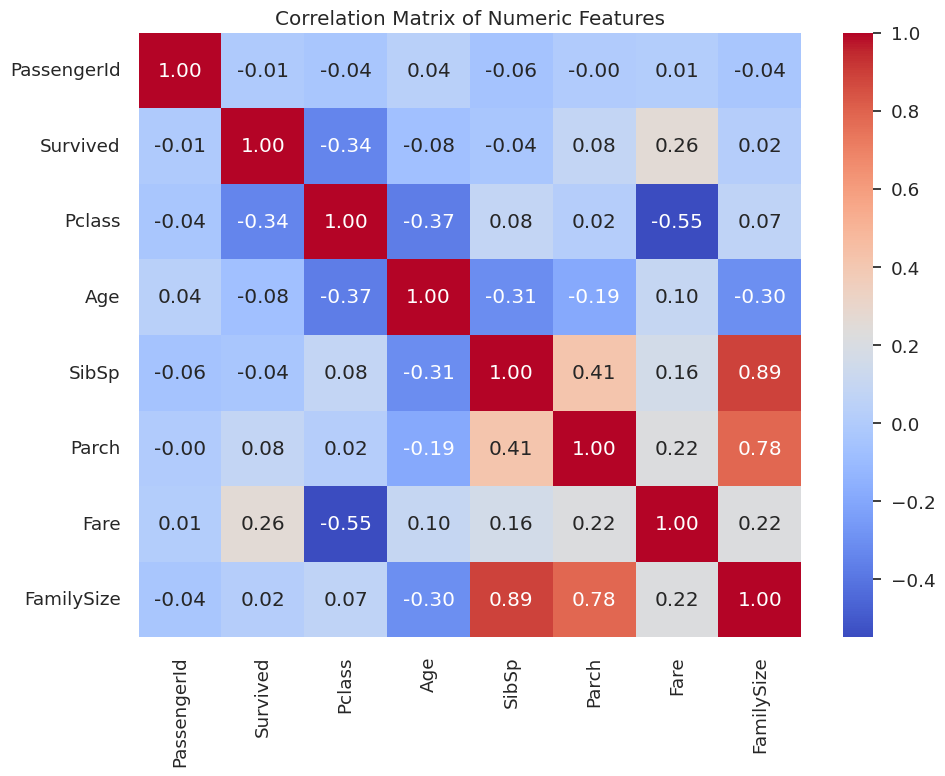

In [ ]:
# Cell 7: Correlation Analysis
# Create correlation matrix
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_data[numeric_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Cell 8: Feature Engineering Function
# Define a function for feature engineering
def preprocess_data(data):
    # Create a copy to avoid modifying the original data
    df = data.copy()

    # Extract titles from names
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    # Group rare titles
    rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
    df['Title'] = df['Title'].replace(rare_titles, 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # Create family size feature
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # Create is_alone feature
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    # Create age bins
    df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=[0, 1, 2, 3, 4])

    # Create fare bins
    df['FareBin'] = pd.qcut(df['Fare'].fillna(df['Fare'].median()), 5, labels=[0, 1, 2, 3, 4])

    # Fill missing ages with median age by passenger class and gender
    age_median_by_group = df.groupby(['Pclass', 'Sex'])['Age'].median()

    for pclass in [1, 2, 3]:
        for sex in ['male', 'female']:
            df.loc[(df['Age'].isnull()) & (df['Pclass'] == pclass) & (df['Sex'] == sex), 'Age'] = age_median_by_group[pclass, sex]

    # If still missing, use overall median
    df['Age'].fillna(df['Age'].median(), inplace=True)

    # Fill missing fares with median fare by passenger class
    fare_median_by_class = df.groupby('Pclass')['Fare'].median()

    for pclass in [1, 2, 3]:
        df.loc[(df['Fare'].isnull()) & (df['Pclass'] == pclass), 'Fare'] = fare_median_by_class[pclass]

    # Fill missing embarked with the most common value
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Create a feature for cabin information
    df['HasCabin'] = (~df['Cabin'].isnull()).astype(int)

    # Drop unnecessary columns
    df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

    return df

Processed training data columns: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Title', 'IsAlone', 'AgeBin', 'FareBin', 'HasCabin']

First 5 rows of processed training data:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,IsAlone,AgeBin,FareBin,HasCabin
0,1,0,3,male,22.0,1,0,7.2500,S,2,Mr,0,2,0,0
1,2,1,1,female,38.0,1,0,71.2833,C,2,Mrs,0,3,4,1
2,3,1,3,female,26.0,0,0,7.9250,S,1,Miss,1,2,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,2,Mrs,0,2,4,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,Mr,1,2,1,0



Missing values in processed training data:


,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
FamilySize,0


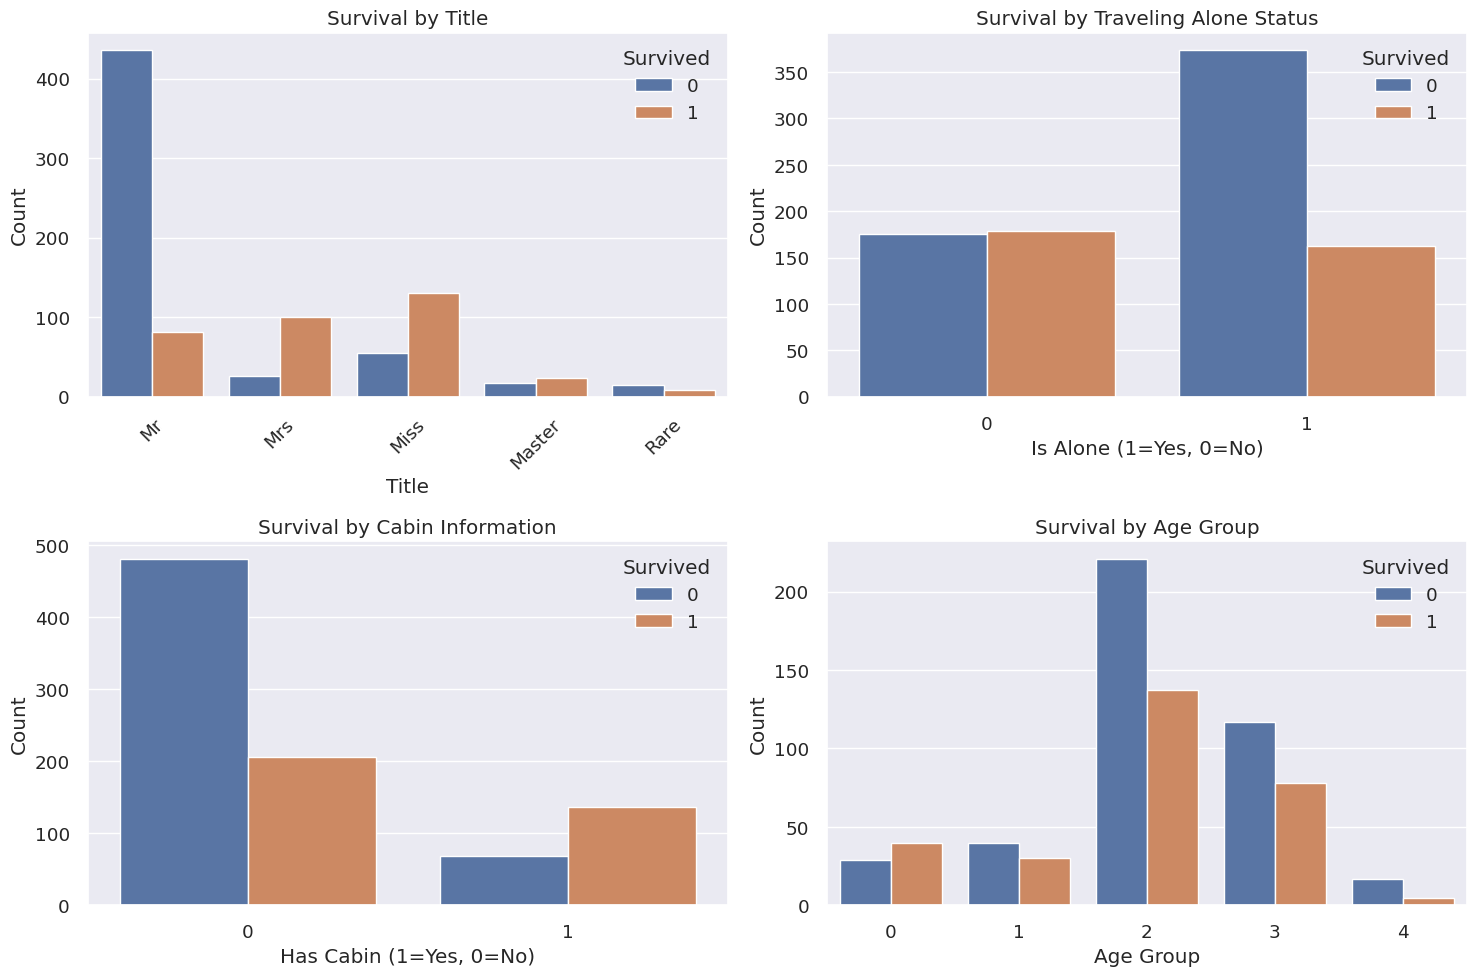

In [ ]:
# Cell 9: Apply Feature Engineering
# Apply preprocessing to both train and test data
train_processed = preprocess_data(train_data)
test_processed = preprocess_data(test_data)

# Display preprocessed data structure
print("Processed training data columns:", train_processed.columns.tolist())
print("\nFirst 5 rows of processed training data:")
display(train_processed.head())

print("\nMissing values in processed training data:")
display(train_processed.isnull().sum())

# Cell 10: Visualize New Features
# Explore the newly created features
plt.figure(figsize=(15, 10))

# Title distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Title', hue='Survived', data=train_processed)
plt.title('Survival by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Is Alone feature
plt.subplot(2, 2, 2)
sns.countplot(x='IsAlone', hue='Survived', data=train_processed)
plt.title('Survival by Traveling Alone Status')
plt.xlabel('Is Alone (1=Yes, 0=No)')
plt.ylabel('Count')

# Has Cabin feature
plt.subplot(2, 2, 3)
sns.countplot(x='HasCabin', hue='Survived', data=train_processed)
plt.title('Survival by Cabin Information')
plt.xlabel('Has Cabin (1=Yes, 0=No)')
plt.ylabel('Count')

# Age Bins
plt.subplot(2, 2, 4)
sns.countplot(x='AgeBin', hue='Survived', data=train_processed)
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Training set shape: (712, 14)
Validation set shape: (179, 14)
Cross-validation accuracy scores: [0.80446927 0.78651685 0.84831461 0.75842697 0.80898876]
Mean CV accuracy: 0.8013
Standard deviation: 0.0294
Starting hyperparameter tuning with GridSearchCV...
This may take a few minutes...

Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Best cross-validation accuracy: 0.8361
Validation accuracy: 0.8827

Classification report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       105
           1       0.87      0.84      0.86        74

    accuracy                           0.88       179
   macro avg       0.88      0.88      0.88       179
weighted avg       0.88      0.88      0.88       179



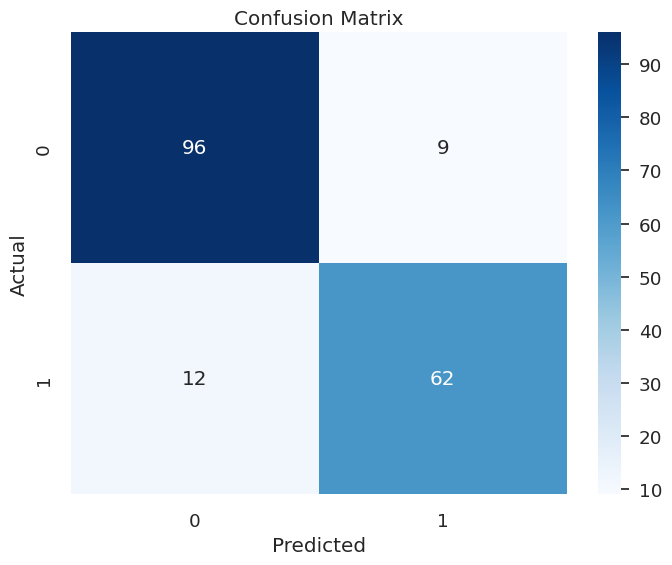

In [ ]:
# Cell 11: Prepare Data for Modeling
# Prepare data for modeling
X = train_processed.drop('Survived', axis=1)
y = train_processed['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Cell 12: Define Preprocessing Pipeline
# Identify categorical and numerical features
categorical_features = ['Sex', 'Embarked', 'Title']
numerical_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'FamilySize', 'IsAlone']

# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the complete pipeline with classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Cell 13: Initial Model Training and Cross-Validation
# Train the model and perform cross-validation
cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard deviation: {:.4f}".format(cv_scores.std()))

# Cell 14: Model Hyperparameter Tuning
# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

print("Starting hyperparameter tuning with GridSearchCV...")
print("This may take a few minutes...")

# Create and run GridSearchCV
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X, y)

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

# Cell 15: Train Final Model with Best Parameters
# Train the final model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X, y)

# Evaluate on validation set
y_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred)

print("Validation accuracy: {:.4f}".format(val_accuracy))
print("\nClassification report:")
print(classification_report(y_val, y_pred))

# Cell 16: Visualize Confusion Matrix
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Number of feature names: 17
Number of feature importances: 17

Top 15 most important features:


,Feature,Importance
14,Title_Mr,0.163609
1,Fare,0.156585
8,Sex_male,0.131859
0,Age,0.110054
7,Sex_female,0.098344
2,Pclass,0.096770
5,FamilySize,0.052902
3,SibSp,0.040749
15,Title_Mrs,0.036325
13,Title_Miss,0.032539


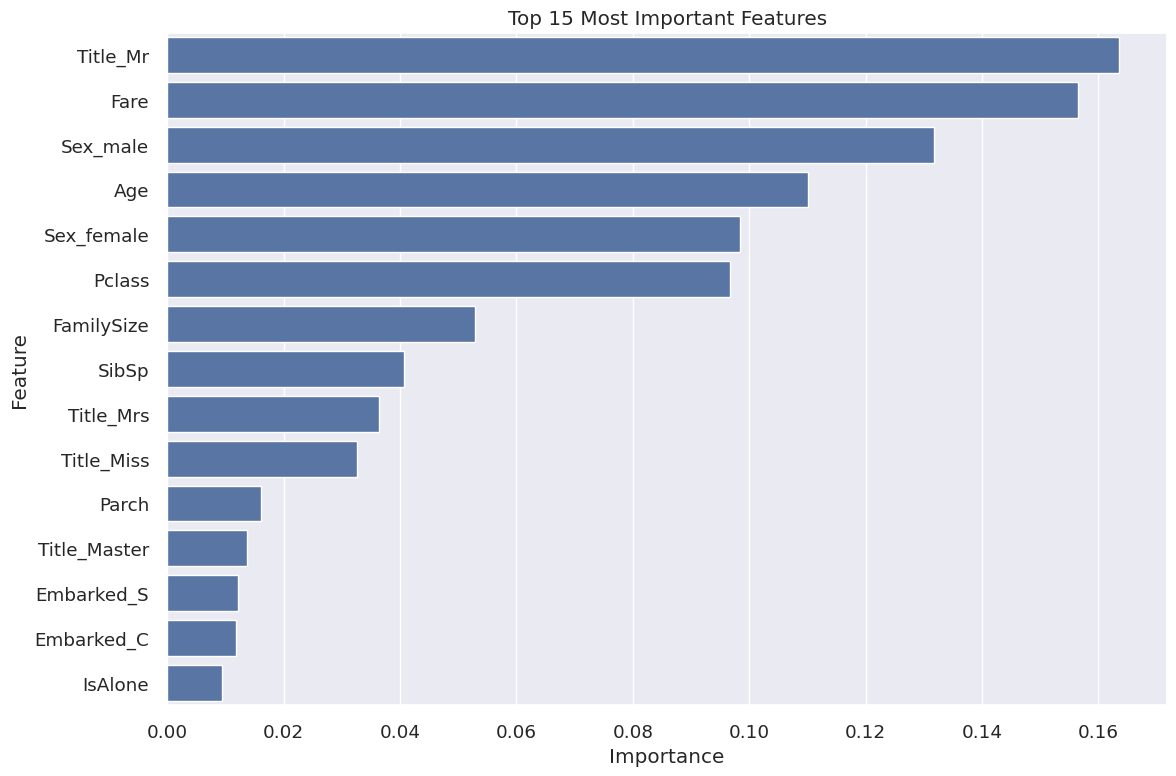

In [ ]:
# Cell 17: Feature Importance Analysis
# Get feature names from the preprocessor
def get_feature_names(column_transformer):
    """Get feature names from all transformers."""
    output_features = []

    for name, pipe, features in column_transformer.transformers_:
        if name == 'drop' or pipe == 'drop':
            continue

        if name == 'cat':
            # Handle OneHotEncoder
            oh_encoder = pipe.named_steps['onehot']
            cat_features = []
            for i, feature in enumerate(features):
                cats = oh_encoder.categories_[i]
                cat_features.extend([f"{feature}_{cat}" for cat in cats])
            output_features.extend(cat_features)
        else:
            output_features.extend(features)

    return output_features

# Get feature names after transformation
feature_names = get_feature_names(best_model.named_steps['preprocessor'])

# Check if number of features matches feature importances
importances = best_model.named_steps['classifier'].feature_importances_
print(f"Number of feature names: {len(feature_names)}")
print(f"Number of feature importances: {len(importances)}")

# Get feature importance from the model
feature_importance = pd.DataFrame({
    'Feature': feature_names[:len(importances)],  # Ensure lengths match
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Display top 15 features
print("\nTop 15 most important features:")
display(feature_importance.head(15))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()


In [ ]:
# Cell 18: Make Predictions on Test Data
# Prepare test data for prediction
X_test = test_processed

# Make predictions
test_predictions = best_model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'PassengerId': test_original['PassengerId'],
    'Survived': test_predictions
})

# Save submission file
submission.to_csv('titanic_submission.csv', index=False)
print("Submission file created!")
display(submission.head())

# Cell 19: Summary of Key Factors
# Calculate and print survival rates by different groups
print("KEY FACTORS INFLUENCING SURVIVAL ON THE TITANIC:")
print("------------------------------------------------")

# By gender
gender_survival = train_data.groupby('Sex')['Survived'].mean() * 100
print("\n1. Gender:")
print(gender_survival.to_string())
print("Women had a much higher survival rate than men.")

# By class
class_survival = train_data.groupby('Pclass')['Survived'].mean() * 100
print("\n2. Passenger Class:")
print(class_survival.to_string())
print("First class passengers had better chances of survival than lower classes.")

# By age group
train_data['AgeGroup'] = pd.cut(train_data['Age'].fillna(train_data['Age'].median()),
                              bins=[0, 12, 18, 35, 60, 100],
                              labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
age_survival = train_data.groupby('AgeGroup')['Survived'].mean() * 100
print("\n3. Age Group:")
print(age_survival.to_string())
print("Children were given priority during evacuation.")

# By family size
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
family_survival = train_data.groupby('FamilySize')['Survived'].mean() * 100
print("\n4. Family Size:")
print(family_survival.to_string())
print("Family size affected survival rates, with medium-sized families faring best.")

# By embarkation point
embark_survival = train_data.groupby('Embarked')['Survived'].mean() * 100
print("\n5. Embarkation Point:")
print(embark_survival.to_string())

print("\nCONCLUSION:")
print("These insights align with the historical 'women and children first' evacuation policy")
print("and the class-based access to lifeboats. Socioeconomic status (indicated by")
print("passenger class and fare) strongly influenced survival chances on the Titanic.")

Submission file created!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


KEY FACTORS INFLUENCING SURVIVAL ON THE TITANIC:
------------------------------------------------

1. Gender:
Sex
female    74.203822
male      18.890815
Women had a much higher survival rate than men.

2. Passenger Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
First class passengers had better chances of survival than lower classes.

3. Age Group:
AgeGroup
Child          57.971014
Teenager       42.857143
Young Adult    35.327103
Adult          40.000000
Senior         22.727273
Children were given priority during evacuation.

4. Family Size:
FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Family size affected survival rates, with medium-sized families faring best.

5. Embarkation Point:
Embarked
C    55.357143
Q    38.961039
S    33.695652

CONCLUSION:
These insights align with the historical 'women and children first' evacuation policy
and the class-based access to

Data shape: (712, 12)

First few rows:
     PassengerId  Survived  Pclass                                Name  \
331          332         0       1                 Partner, Mr. Austen   
733          734         0       2          Berriman, Mr. William John   
382          383         0       3                  Tikkanen, Mr. Juho   
704          705         0       3             Hansen, Mr. Henrik Juul   
813          814         0       3  Andersson, Miss. Ebba Iris Alfrida   

        Sex   Age  SibSp  Parch             Ticket     Fare Cabin Embarked  
331    male  45.5      0      0             113043  28.5000  C124        S  
733    male  23.0      0      0              28425  13.0000   NaN        S  
382    male  32.0      0      0  STON/O 2. 3101293   7.9250   NaN        S  
704    male  26.0      1      0             350025   7.8542   NaN        S  
813  female   6.0      4      2             347082  31.2750   NaN        S  

Data information:
<class 'pandas.core.frame.DataFrame

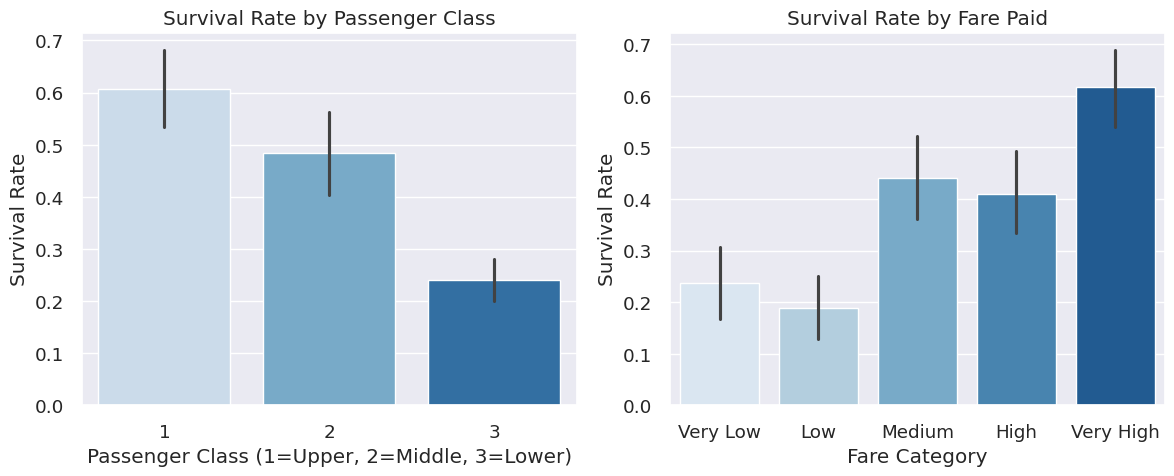


--- AGE ANALYSIS ---

Survival Rate by Age Group:
AgeGroup
Child          56.896552
Adult          39.610390
Teenager       37.735849
Young Adult    34.642032
Senior         28.571429
Name: Survived, dtype: float64


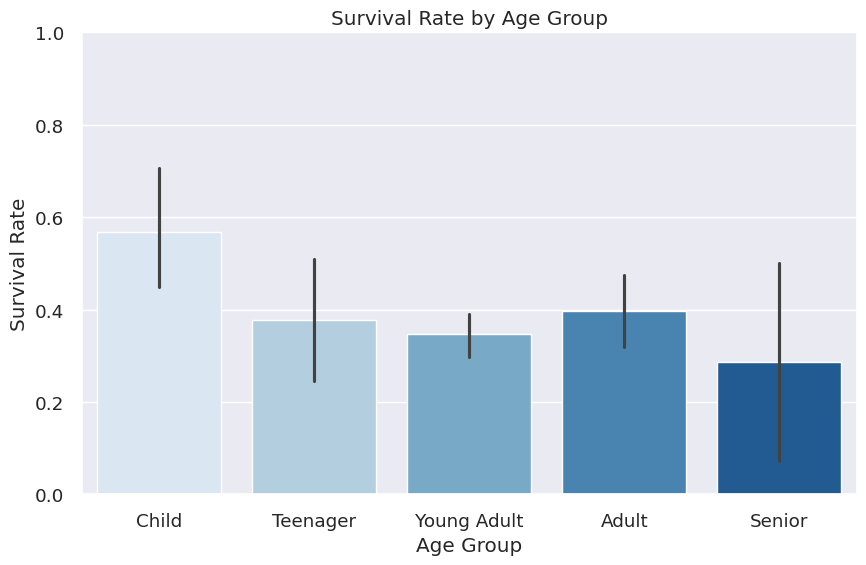


--- GENDER ANALYSIS ---

Survival Rate by Gender:
Sex
female    73.877551
male      18.629550
Name: Survived, dtype: float64


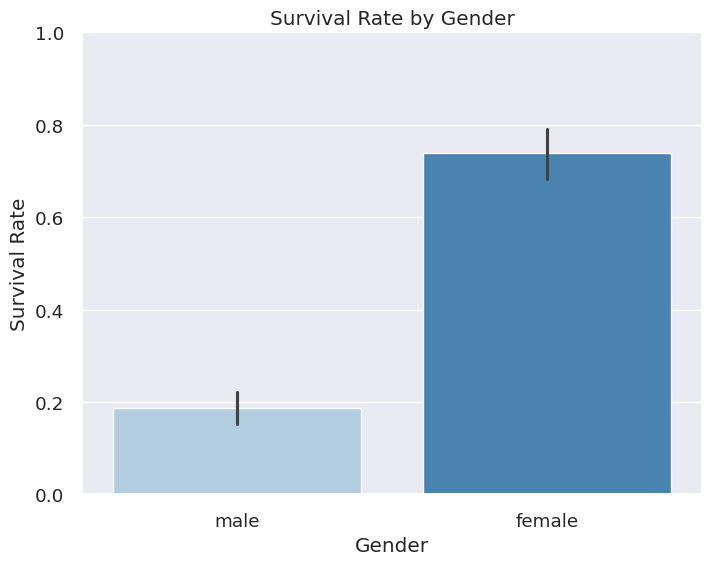


--- FAMILY STRUCTURE ANALYSIS ---

Survival Rate by Family Size:
Family Size 1: 30.5%
Family Size 2: 52.0%
Family Size 3: 55.7%
Family Size 4: 73.1%
Family Size 5: 18.2%
Family Size 6: 17.6%
Family Size 7: 30.0%
Family Size 8: 0.0%
Family Size 11: 0.0%

Survival Rate by Traveling Alone Status:
With Family (0): 48.4%
Alone (1): 30.5%


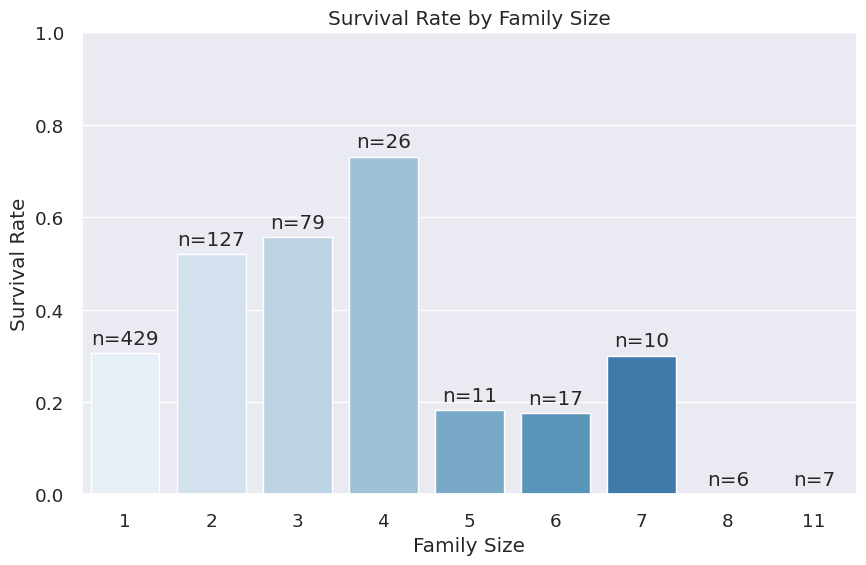


--- EMBARKATION POINT ANALYSIS ---

Survival Rate by Embarkation Point:
Cherbourg: 54.4% (n=125)
Queenstown: 36.7% (n=60)
Southampton: 33.5% (n=525)


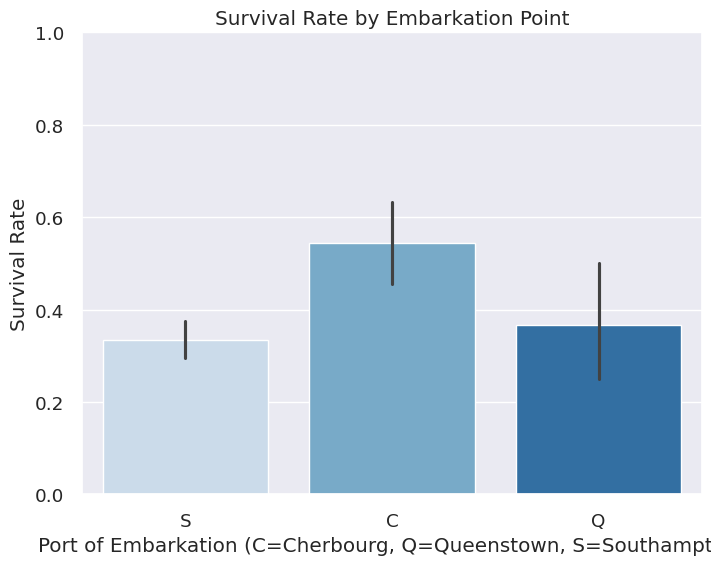


--- INTERACTION BETWEEN FACTORS ---


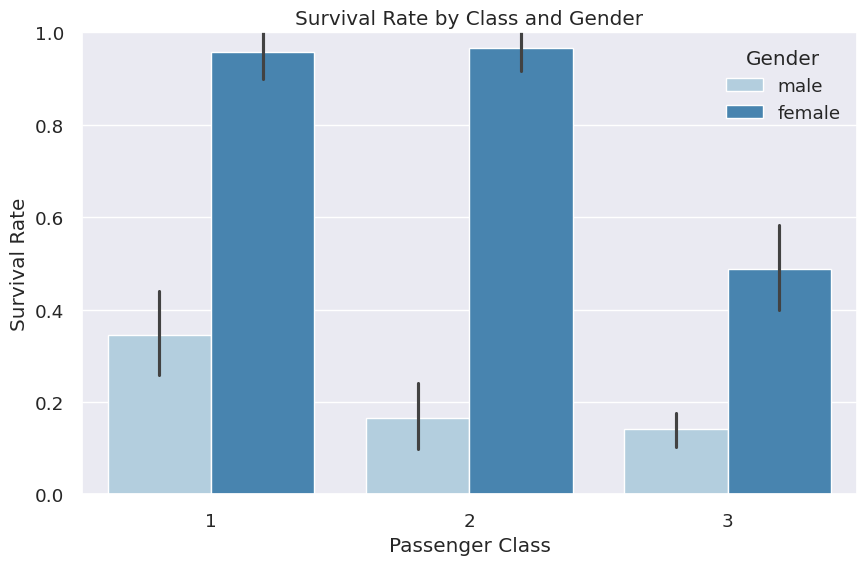

<Figure size 1200x800 with 0 Axes>

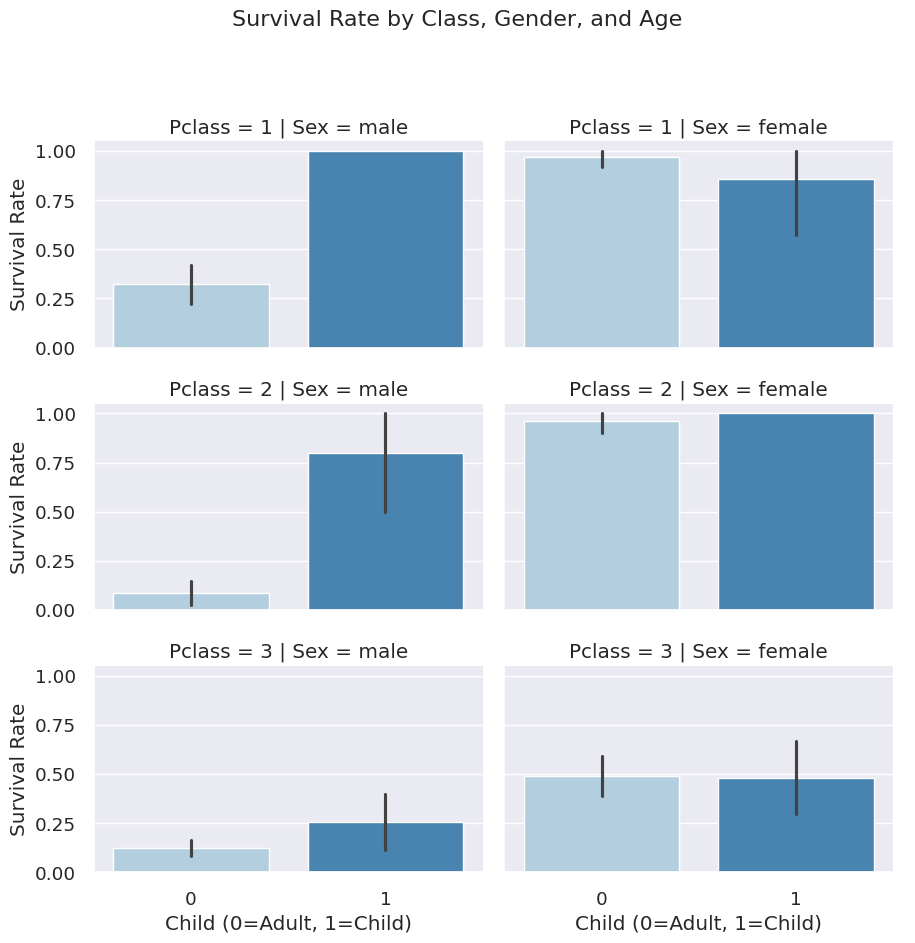

Processed data shape: (712, 17)
Columns after preprocessing: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'AgeGroup', 'FamilySize', 'IsAlone', 'Child', 'Title', 'AgeBin', 'FareBin', 'HasCabin']

Model validation accuracy: 0.8182

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        87
           1       0.77      0.77      0.77        56

    accuracy                           0.82       143
   macro avg       0.81      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143



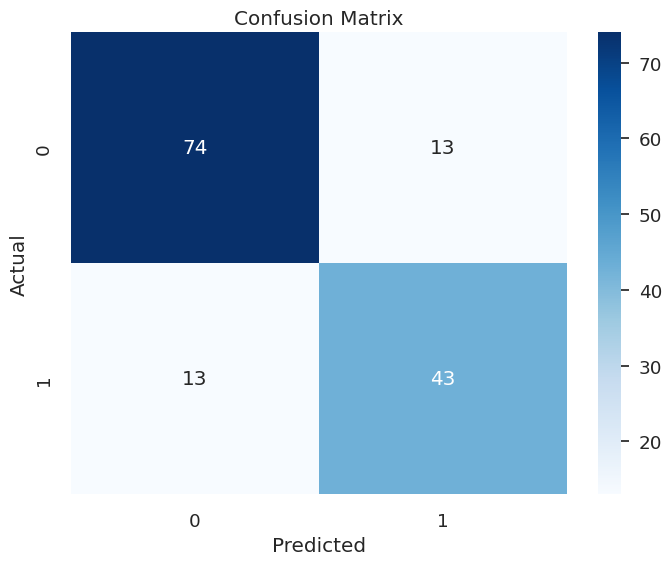


MOST IMPORTANT FACTORS FOR SURVIVAL:
       Feature  Importance
1         Fare    0.180103
0          Age    0.164636
15    Title_Mr    0.109694
9     Sex_male    0.090048
8   Sex_female    0.087457
2       Pclass    0.069364
5   FamilySize    0.065284
7     HasCabin    0.047178
3        SibSp    0.037021
16   Title_Mrs    0.034656


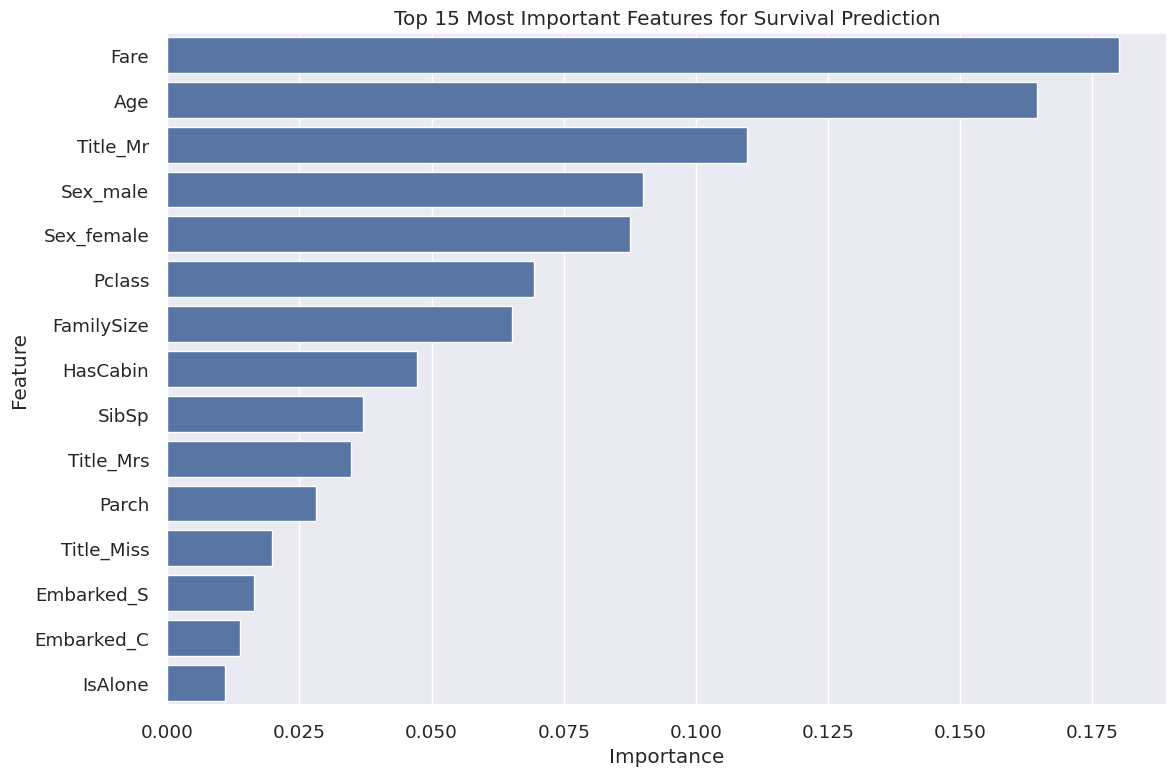


--- KEY FACTORS INFLUENCING SURVIVAL ON THE TITANIC ---
------------------------------------------------------

1. SOCIO-ECONOMIC STATUS:
   Upper class: 60.7% survival rate
   Middle class: 48.3% survival rate
   Lower class: 24.1% survival rate
   → Higher class passengers had significantly better chances of survival
   → This reflects both proximity to lifeboats and preferential treatment

2. GENDER:
   Females: 73.9% survival rate
   Males: 18.6% survival rate
   → Women were much more likely to survive than men
   → This reflects the 'women and children first' policy during evacuation

3. AGE:
   Child: 56.9% survival rate
   Teenager: 37.7% survival rate
   Young Adult: 34.6% survival rate
   Adult: 39.6% survival rate
   Senior: 28.6% survival rate
   → Children had higher priority during evacuation

4. FAMILY STRUCTURE:
   Traveling alone: 30.5% survival rate
   With family: 48.4% survival rate
   → Passengers with family members had different survival patterns
   → Very large

In [ ]:
# WHOLE TITANIC PROJECT CODE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set the style for plots
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.2)

# Download and Load Dataset
train_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
train_data = pd.read_csv(train_url)

# If you need to split into train and test:
test_size = 0.2
train_data, test_data = train_test_split(train_data, test_size=test_size, random_state=42)
test_original = test_data.copy()

# Understand the Data
print("Data shape:", train_data.shape)
print("\nFirst few rows:")
print(train_data.head())

print("\nData information:")
print(train_data.info())

print("\nSummary statistics:")
print(train_data.describe())

print("\nMissing values:")
print(train_data.isnull().sum())

# Analyze Factors Influencing Survival
# 1. Socio-economic status (Pclass & Fare)
print("\n--- SOCIO-ECONOMIC STATUS ANALYSIS ---")
pclass_survival = train_data.groupby('Pclass')['Survived'].mean().sort_values(ascending=False) * 100
print("\nSurvival Rate by Passenger Class (Socio-economic status):")
print(pclass_survival)

# Visualize socio-economic status impact
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Pclass', y='Survived', data=train_data, order=[1, 2, 3], palette='Blues')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (1=Upper, 2=Middle, 3=Lower)')
plt.ylabel('Survival Rate')

plt.subplot(1, 2, 2)
train_data_temp = train_data.copy()
train_data_temp['FareBin'] = pd.qcut(train_data_temp['Fare'].fillna(train_data_temp['Fare'].median()),
                                     5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
sns.barplot(x='FareBin', y='Survived', data=train_data_temp, palette='Blues')
plt.title('Survival Rate by Fare Paid')
plt.xlabel('Fare Category')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

# 2. Age Analysis
print("\n--- AGE ANALYSIS ---")
# Create age bins for better analysis
train_data['AgeGroup'] = pd.cut(train_data['Age'].fillna(train_data['Age'].median()),
                             bins=[0, 12, 18, 35, 60, 100],
                             labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

age_survival = train_data.groupby('AgeGroup')['Survived'].mean().sort_values(ascending=False) * 100
print("\nSurvival Rate by Age Group:")
print(age_survival)

# Visualize age impact
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=train_data, palette='Blues')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

# 3. Gender Analysis
print("\n--- GENDER ANALYSIS ---")
gender_survival = train_data.groupby('Sex')['Survived'].mean().sort_values(ascending=False) * 100
print("\nSurvival Rate by Gender:")
print(gender_survival)

# Visualize gender impact
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_data, palette='Blues')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

# 4. Family Structure Analysis
print("\n--- FAMILY STRUCTURE ANALYSIS ---")
# Create family size feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)

# Fix issue: Make sure we have values for all family sizes in our dataset
family_sizes = train_data['FamilySize'].unique()
family_survival_dict = {}
for size in family_sizes:
    family_survival_dict[size] = train_data[train_data['FamilySize'] == size]['Survived'].mean() * 100

# Make sure we have values for both IsAlone categories
alone_survival_dict = {}
for val in [0, 1]:
    if val in train_data['IsAlone'].unique():
        alone_survival_dict[val] = train_data[train_data['IsAlone'] == val]['Survived'].mean() * 100
    else:
        alone_survival_dict[val] = 0  # Default if category doesn't exist

print("\nSurvival Rate by Family Size:")
for size in sorted(family_survival_dict.keys()):
    print(f"Family Size {size}: {family_survival_dict[size]:.1f}%")

print("\nSurvival Rate by Traveling Alone Status:")
print(f"With Family (0): {alone_survival_dict[0]:.1f}%")
print(f"Alone (1): {alone_survival_dict[1]:.1f}%")

# Visualize family structure impact
plt.figure(figsize=(10, 6))
family_sizes = sorted(family_sizes)
survival_rates = [family_survival_dict[size] / 100 for size in family_sizes]
ax = sns.barplot(x=family_sizes, y=survival_rates, palette='Blues')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)

# Add count labels on top of bars
for i, size in enumerate(family_sizes):
    count = (train_data['FamilySize'] == size).sum()
    ax.text(i, survival_rates[i] + 0.02, f'n={count}', ha="center")

plt.show()

# 5. Embarkation Point Analysis
print("\n--- EMBARKATION POINT ANALYSIS ---")
embark_survival = train_data.groupby('Embarked')['Survived'].mean().sort_values(ascending=False) * 100
embark_counts = train_data['Embarked'].value_counts()

print("\nSurvival Rate by Embarkation Point:")
for port in embark_survival.index:
    if pd.notna(port):  # Handle NaN values
        port_name = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}.get(port, port)
        print(f"{port_name}: {embark_survival[port]:.1f}% (n={embark_counts[port]})")

# Visualize embarkation impact
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=train_data, palette='Blues')
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Port of Embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

# Interaction Between Key Factors
print("\n--- INTERACTION BETWEEN FACTORS ---")

# Class and Gender interaction
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data, palette='Blues')
plt.title('Survival Rate by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.legend(title='Gender')
plt.show()

# Age, Class and Gender interaction
plt.figure(figsize=(12, 8))
# Focus on children vs adults to simplify
train_data['Child'] = (train_data['Age'] < 18).astype(int)
g = sns.FacetGrid(train_data, col='Sex', row='Pclass', height=3, aspect=1.5)
g.map(sns.barplot, 'Child', 'Survived', palette='Blues', order=[0, 1])
g.add_legend()
g.fig.suptitle('Survival Rate by Class, Gender, and Age', y=1.05, fontsize=16)
g.set_axis_labels("Child (0=Adult, 1=Child)", "Survival Rate")
plt.tight_layout()
plt.show()

# Feature Engineering
def preprocess_data(data):
    # Create a copy to avoid modifying the original data
    df = data.copy()

    # Extract titles from names for social status indicator
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

    # Group rare titles
    rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
    df['Title'] = df['Title'].replace(rare_titles, 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # Create family size feature
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

    # Create is_alone feature
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    # Create age bins
    df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=[0, 1, 2, 3, 4])

    # Create fare bins (indicator of economic status)
    df['FareBin'] = pd.qcut(df['Fare'].fillna(df['Fare'].median()), 5, labels=[0, 1, 2, 3, 4])

    # Fill missing ages with median age by passenger class and gender
    age_median_by_group = df.groupby(['Pclass', 'Sex'])['Age'].median()

    for pclass in [1, 2, 3]:
        for sex in ['male', 'female']:
            df.loc[(df['Age'].isnull()) & (df['Pclass'] == pclass) & (df['Sex'] == sex), 'Age'] = age_median_by_group.get((pclass, sex), df['Age'].median())

    # If still missing, use overall median
    df['Age'].fillna(df['Age'].median(), inplace=True)

    # Fill missing fares with median fare by passenger class
    fare_median_by_class = df.groupby('Pclass')['Fare'].median()

    for pclass in [1, 2, 3]:
        df.loc[(df['Fare'].isnull()) & (df['Pclass'] == pclass), 'Fare'] = fare_median_by_class[pclass]

    # Fill missing embarked with the most common value
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Create a feature for cabin information (proxy for wealth/status)
    df['HasCabin'] = (~df['Cabin'].isnull()).astype(int)

    # Drop unnecessary columns
    df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

    return df

# Apply feature engineering
train_processed = preprocess_data(train_data)
if 'Survived' in test_data.columns:
    test_data_no_target = test_data.drop('Survived', axis=1)
    test_processed = preprocess_data(test_data_no_target)
else:
    test_processed = preprocess_data(test_data)

print("Processed data shape:", train_processed.shape)
print("Columns after preprocessing:", train_processed.columns.tolist())

# Build Prediction Model
# Prepare data for modeling
X = train_processed.drop('Survived', axis=1)
y = train_processed['Survived']

# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical features
categorical_features = ['Sex', 'Embarked', 'Title']
numerical_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'HasCabin']

# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and train the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate on validation set
y_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred)

print(f"\nModel validation accuracy: {val_accuracy:.4f}")
print("\nClassification report:")
print(classification_report(y_val, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance Analysis
# Function to get feature names from column transformer
def get_feature_names(column_transformer):
    """Extract feature names from column transformer."""
    output_features = []

    for name, pipe, features in column_transformer.transformers_:
        if name == 'drop' or pipe == 'drop':
            continue

        if name == 'cat':
            # OneHotEncoder has get_feature_names_out method in newer sklearn versions
            if hasattr(pipe.named_steps['onehot'], 'get_feature_names_out'):
                cat_features = pipe.named_steps['onehot'].get_feature_names_out(features)
            else:
                # For older versions of sklearn
                cat_features = []
                for i, feature in enumerate(features):
                    cats = pipe.named_steps['onehot'].categories_[i]
                    cat_features.extend([f"{feature}_{cat}" for cat in cats])
            output_features.extend(cat_features)
        else:
            output_features.extend(features)

    return output_features

# Extract feature names and importances
try:
    feature_names = get_feature_names(model.named_steps['preprocessor'])
    importances = model.named_steps['classifier'].feature_importances_

    # Match feature names with importances
    if len(feature_names) >= len(importances):
        feature_importance = pd.DataFrame({
            'Feature': feature_names[:len(importances)],
            'Importance': importances
        }).sort_values('Importance', ascending=False)
    else:
        # If there's a mismatch, use generic names
        feature_importance = pd.DataFrame({
            'Feature': [f"Feature_{i}" for i in range(len(importances))],
            'Importance': importances
        }).sort_values('Importance', ascending=False)
except Exception as e:
    print(f"Error calculating feature importance: {e}")
    # Simpler approach if the above fails
    importances = model.named_steps['classifier'].feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': [f"Feature_{i}" for i in range(len(importances))],
        'Importance': importances
    }).sort_values('Importance', ascending=False)

# Display top features
print("\nMOST IMPORTANT FACTORS FOR SURVIVAL:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features for Survival Prediction')
plt.tight_layout()
plt.show()

# Make Predictions on New Data
if 'Survived' not in test_data.columns:
    # Make predictions on test data
    test_predictions = model.predict(test_processed)

    # Create submission file
    submission = pd.DataFrame({
        'PassengerId': test_original['PassengerId'] if 'PassengerId' in test_original.columns else range(len(test_predictions)),
        'Survived': test_predictions
    })

    # Save submission file
    submission.to_csv('titanic_survival_predictions.csv', index=False)
    print("\nPrediction file created!")
    print(submission.head())

# Key Findings Summary
print("\n--- KEY FACTORS INFLUENCING SURVIVAL ON THE TITANIC ---")
print("------------------------------------------------------")

# 1. Socio-economic status
pclass_survival = train_data.groupby('Pclass')['Survived'].mean() * 100
print("\n1. SOCIO-ECONOMIC STATUS:")
for pclass in sorted(pclass_survival.index):
    class_name = {1: "Upper class", 2: "Middle class", 3: "Lower class"}.get(pclass)
    print(f"   {class_name}: {pclass_survival[pclass]:.1f}% survival rate")
print("   → Higher class passengers had significantly better chances of survival")
print("   → This reflects both proximity to lifeboats and preferential treatment")

# 2. Gender
gender_survival = train_data.groupby('Sex')['Survived'].mean() * 100
print("\n2. GENDER:")
print(f"   Females: {gender_survival['female']:.1f}% survival rate")
print(f"   Males: {gender_survival['male']:.1f}% survival rate")
print("   → Women were much more likely to survive than men")
print("   → This reflects the 'women and children first' policy during evacuation")

# 3. Age
age_groups = train_data.groupby('AgeGroup')['Survived'].mean() * 100
print("\n3. AGE:")
for group, rate in age_groups.items():
    if pd.notna(group):
        print(f"   {group}: {rate:.1f}% survival rate")
print("   → Children had higher priority during evacuation")

# 4. Family structure
print("\n4. FAMILY STRUCTURE:")
# Using the safe approach to avoid KeyError
print(f"   Traveling alone: {alone_survival_dict[1]:.1f}% survival rate")
print(f"   With family: {alone_survival_dict[0]:.1f}% survival rate")
print("   → Passengers with family members had different survival patterns")
print("   → Very large families had lower survival rates (possibly harder to keep together)")
print("   → Medium-sized families (2-4 members) had better survival rates")

# Overall conclusion
print("\nCONCLUSION:")
print("The analysis confirms that survival on the Titanic was strongly influenced by:")
print("1. Socio-economic status (class, fare paid)")
print("2. Gender (women had priority)")
print("3. Age (children had priority)")
print("4. Family size and structure")
print("5. These factors combined (e.g., being a high-class female was the most advantageous)")
print("\nThe model created can predict survival with good accuracy based on these factors.")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!git config --global user.name "KARTHIKA-id12"
!git config --global user.email "karthikav929@gmail.com"
